# Playing with NOvA HDF5 Files
# How easy is it to create some quick and dirty FD MC analysis plots



In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from sklearn.model_selection import train_test_split

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.10.0


In [2]:
import enum 

# Neutrino interaction categories
class Mode(enum.Enum): 
    kUnknownMode               = -1
    kQE                        = 0
    kRes                       = 1
    kDIS                       = 2
    kCoh                       = 3
    kCohElastic                = 4
    kElectronScattering        = 5
    kIMDAnnihilation           = 6
    kInverseBetaDecay          = 7
    kGlashowResonance          = 8
    kAMNuGamma                 = 9
    kMEC                       = 10
    kDiffractive               = 11
    kEM                        = 12
    kWeakMix                   = 13



class Interaction(enum.Enum):
    kNumuQE =0           # Numu CC QE interaction
    kNumuRes =1           # Numu CC Resonant interaction
    kNumuDIS = 2          # Numu CC DIS interaction
    kNumuOther = 3        # Numu CC, other than above
    kNueQE = 4            # Nue CC QE interaction
    kNueRes = 5           # Nue CC Resonant interaction
    kNueDIS = 6           # Nue CC DIS interaction
    kNueOther = 7         # Nue CC, other than above
    kNutauQE = 8          # Nutau CC QE interaction
    kNutauRes = 9         # Nutau CC Resonant interaction
    kNutauDIS =10         # Nutau CC DIS interaction
    kNutauOther =11       # Nutau CC, other than above
    kNuElectronElastic = 12# NC Nu On E Scattering
    kNC =13                # NC interaction
    kCosmic =14           # Cosmic ray background
    kOther =15            # Something else.  Tau?  Hopefully we don't use this
    kNIntType=16          # Number of interaction types, used like a vector size

    
class FinalState(enum.Enum):
    kNumu0tr0sh=0          # Numu CC - no track no shower
    kNumu0tr1sh=1          # Numu CC - no track  1 shower
    kNumu0tr2sh=enum.auto()          # Numu CC - no track  2 shower
    kNumu0trMsh=enum.auto()          # Numu CC - no track 3+ shower
    kNumu1tr0sh=enum.auto()          # Numu CC -  1 track no shower
    kNumu1tr1sh=enum.auto()          # Numu CC -  1 track  1 shower
    kNumu1tr2sh=enum.auto()          # Numu CC -  1 track  2 shower
    kNumu1trMsh=enum.auto()          # Numu CC -  1 track 3+ shower
    kNumu2tr0sh=enum.auto()          # Numu CC -  2 track no shower
    kNumu2tr1sh=enum.auto()          # Numu CC -  2 track  1 shower
    kNumu2tr2sh=enum.auto()          # Numu CC -  2 track  2 shower
    kNumu2trMsh=enum.auto()          # Numu CC -  2 track 3+ shower
    kNumuMtr0sh=enum.auto()          # Numu CC - 3+ track no showe
    kNumuMtr1sh=enum.auto()          # Numu CC - 3+ track  1 shower
    kNumuMtr2sh=enum.auto()          # Numu CC - 3+ track  2 showe
    kNumuMtrMsh=enum.auto()          # Numu CC - 3+ track 3+ shower
    kNue0tr0sh=enum.auto()           # Nue CC - no track no shower
    kNue0tr1sh=enum.auto()           # Nue CC - no track  1 shower
    kNue0tr2sh=enum.auto()           # Nue CC - no track  2 showe
    kNue0trMsh=enum.auto()           # Nue CC - no track 3+ shower
    kNue1tr0sh=enum.auto()           # Nue CC -  1 track no shower
    kNue1tr1sh=enum.auto()           # Nue CC -  1 track  1 shower
    kNue1tr2sh=enum.auto()           # Nue CC -  1 track  2 shower
    kNue1trMsh=enum.auto()           # Nue CC -  1 track 3+ shower
    kNue2tr0sh=enum.auto()           # Nue CC -  2 track no shower
    kNue2tr1sh=enum.auto()           # Nue CC -  2 track  1 shower
    kNue2tr2sh=enum.auto()           # Nue CC -  2 track  2 shower
    kNue2trMsh=enum.auto()           # Nue CC -  2 track 3+ shower
    kNueMtr0sh=enum.auto()           # Nue CC - 3+ track no shower
    kNueMtr1sh=enum.auto()           # Nue CC - 3+ track  1 shower
    kNueMtr2sh=enum.auto()           # Nue CC - 3+ track  2 shower
    kNueMtrMsh=enum.auto()           # Nue CC - 3+ track 3+ shower
    kNC0tr0sh=enum.auto()           # NC CC - no track no shower
    kNC0tr1sh=enum.auto()           # NC CC - no track  1 shower
    kNC0tr2sh=enum.auto()           # NC CC - no track  2 shower
    kNC0trMsh=enum.auto()           # NC CC - no track 3+ shower
    kNC1tr0sh=enum.auto()           # NC CC -  1 track no shower
    kNC1tr1sh=enum.auto()           # NC CC -  1 track  1 shower
    kNC1tr2sh=enum.auto()           # NC CC -  1 track  2 shower
    kNC1trMsh=enum.auto()           # NC CC -  1 track 3+ shower
    kNC2tr0sh=enum.auto()           # NC CC -  2 track no shower
    kNC2tr1sh=enum.auto()           # NC CC -  2 track  1 shower
    kNC2tr2sh=enum.auto()           # NC CC -  2 track  2 shower
    kNC2trMsh=enum.auto()           # NC CC -  2 track 3+ shower
    kNCMtr0sh=enum.auto()           # NC CC - 3+ track no shower
    kNCMtr1sh=enum.auto()           # NC CC - 3+ track  1 shower
    kNCMtr2sh=enum.auto()           # NC CC - 3+ track  2 shower
    kNCMtrMsh=enum.auto()           # NC CC - 3+ track 3+ shower
    kCosmicFS=enum.auto()           # Cosmic ray background
    kOtherFS=enum.auto()            # Something else.  Tau?  Hopefully we don't use this
    kNFStType=enum.auto()            # Number of final state types, used like a vector size



In [3]:
# import glob
import glob
 
# Copy a network object to a local file
#urllib.request.urlretrieve('http://www.hep.ucl.ac.uk/undergrad/0056/other/projects/nova/neutrino1.h5', "neutrino1.h5")

#Open the local h5 file with h5py
#fileName='FD-Nominal-FHC-Nonswap/fardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_1000_r00035865_s12_c000_R20-11-25-prod5.1reco.l_v1_20211112_171447_sim.h5caf.h5'
#df=h5py.File('FD-Nominal-FHC-Nonswap/fardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_1000_r00035865_s12_c000_R20-11-25-prod5.1reco.l_v1_20211112_171447_sim.h5caf.h5','r')
#df=h5py.File('mergecopy.h5','r')
#df=h5py.File('FD-Nominal-FHC-Nonswap_copymerge/copymerged_c14_cl100.h5')
df=h5py.File('reallymini.h5')    

td={}
for key in df.keys():
    td[key]=np.array(df[key])



In [4]:
#Print the keys in the neutrino meta data
print(td.keys())

dict_keys(['3flavourveto', 'ccAll', 'cosBeamFirst', 'isANuECC', 'isANuMuCC', 'isCC', 'isNC', 'isNotNu', 'isNuECC', 'isNuMu', 'isNuMuCC', 'modeAll', 'nonselANueCC', 'nonselANumuCC', 'nonselCosmic', 'nonselNC', 'nonselNueCC', 'nonselNumuCC', 'numu2020pid', 'numuBasicQuality', 'numuQuality', 'numucontain', 'numucosrej', 'numufull', 'numunotpid', 'pdgAll', 'pmu', 'pt', 'ptp', 'rec.energy.numu.E', 'rec.energy.numu.calccE', 'rec.energy.numu.hadcalE', 'rec.energy.numu.hadclust.calE', 'rec.energy.numu.hadclust.nhit', 'rec.energy.numu.hadtrkE', 'rec.energy.numu.lstmmuon', 'rec.energy.numu.lstmnu', 'rec.energy.numu.regcvnhadE', 'rec.energy.numu.trkccE', 'rec.mc.nnu', 'rec.sel.contain.cosbakcell', 'rec.sel.contain.cosfwdcell', 'rec.sel.contain.kalbakcell', 'rec.sel.contain.kalfwdcell', 'rec.sel.cosrej.numucontpid2020fhc', 'rec.sel.cvnloosepreselptp.cosmicid', 'rec.sel.cvnloosepreselptp.ncid', 'rec.sel.cvnloosepreselptp.nueid', 'rec.sel.cvnloosepreselptp.numuid', 'rec.sel.cvnloosepreselptp.nutauid

(0.09001640081405637, 5.229931351542473)

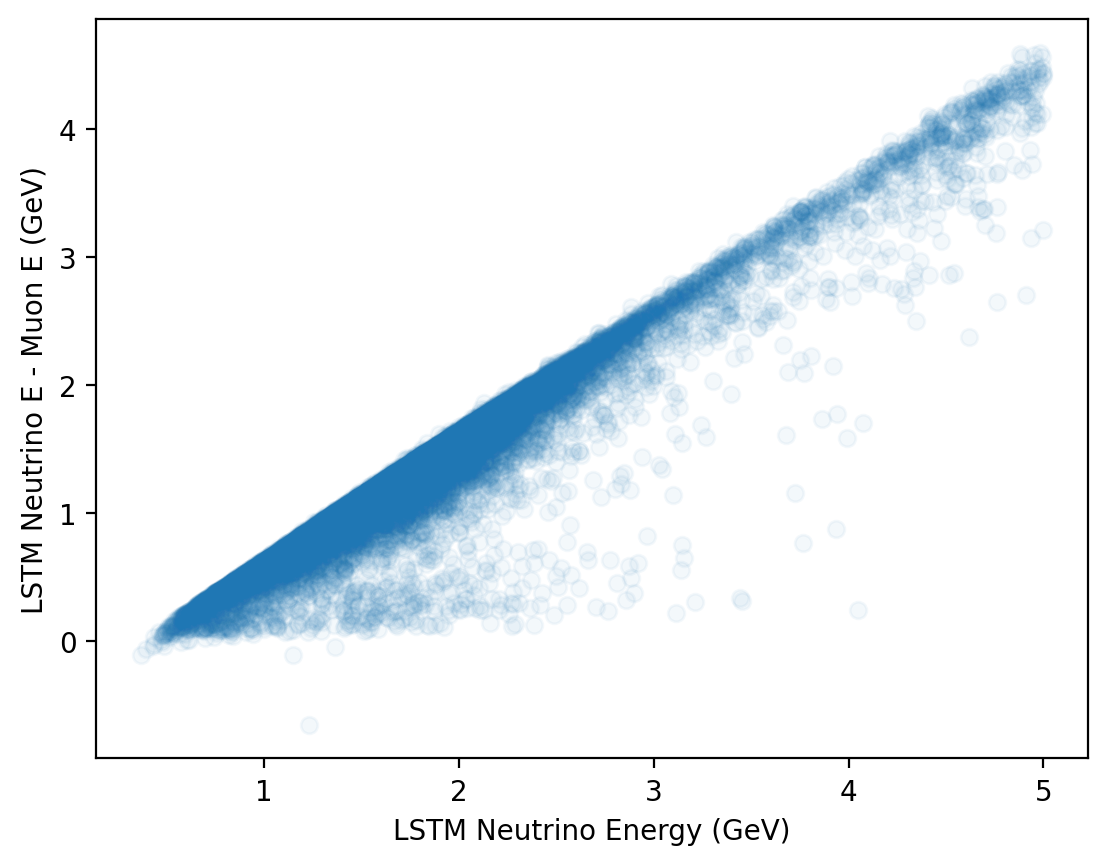

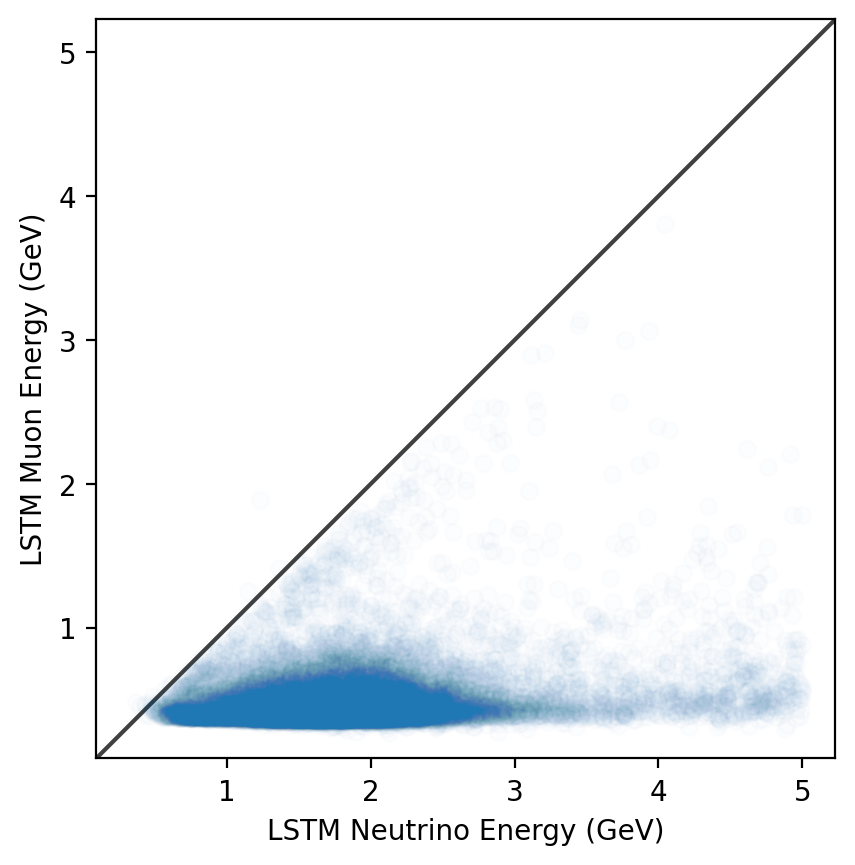

In [5]:

fig, ax = plt.subplots()
ax.scatter(td['rec.energy.numu.lstmnu'][td['isNuMuCC']>0],td['rec.energy.numu.lstmnu'][td['isNuMuCC']>0]-td['rec.energy.numu.lstmmuon'][td['isNuMuCC']>0],alpha=0.05)
ax.set_xlabel("LSTM Neutrino Energy (GeV)")
ax.set_ylabel("LSTM Neutrino E - Muon E (GeV)")


fig, ax = plt.subplots()
ax.scatter(td['rec.energy.numu.lstmnu'][td['isNuMuCC']>0],td['rec.energy.numu.lstmmuon'][td['isNuMuCC']>0],alpha=0.01)
ax.set_xlabel("LSTM Neutrino Energy (GeV)")
ax.set_ylabel("LSTM Muon Energy (GeV)")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)


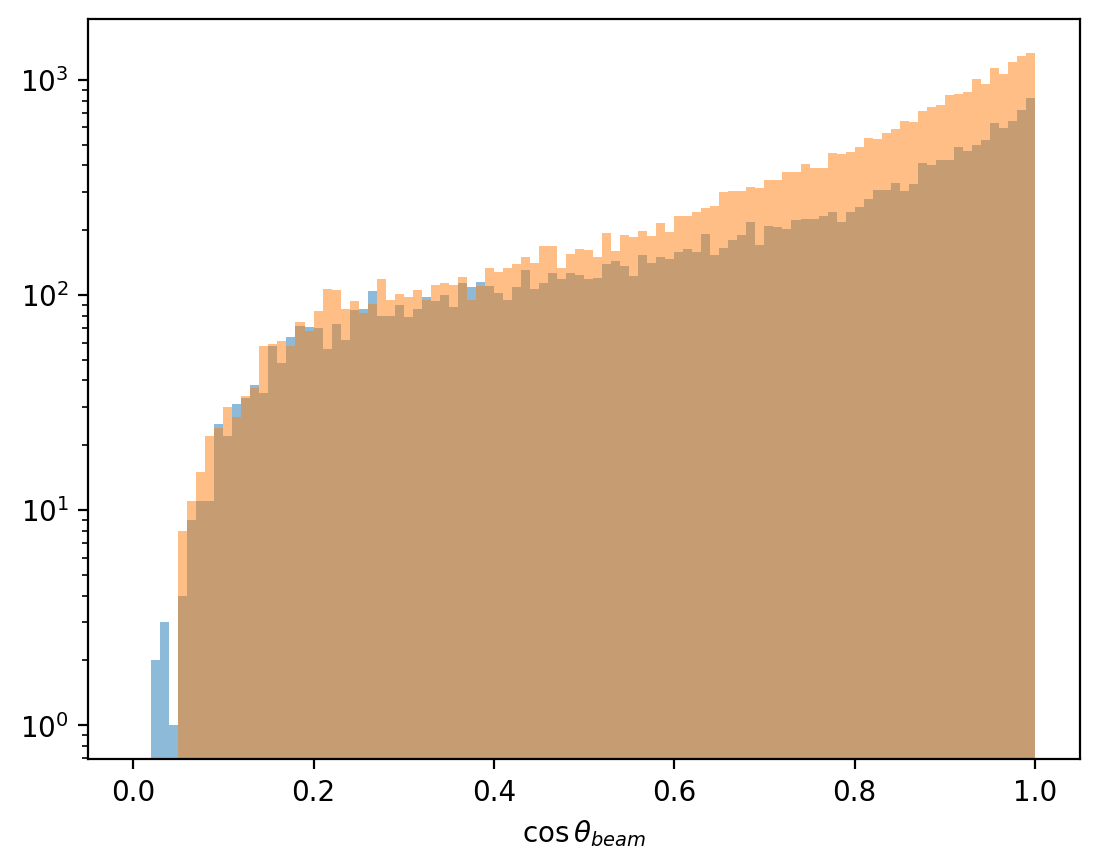

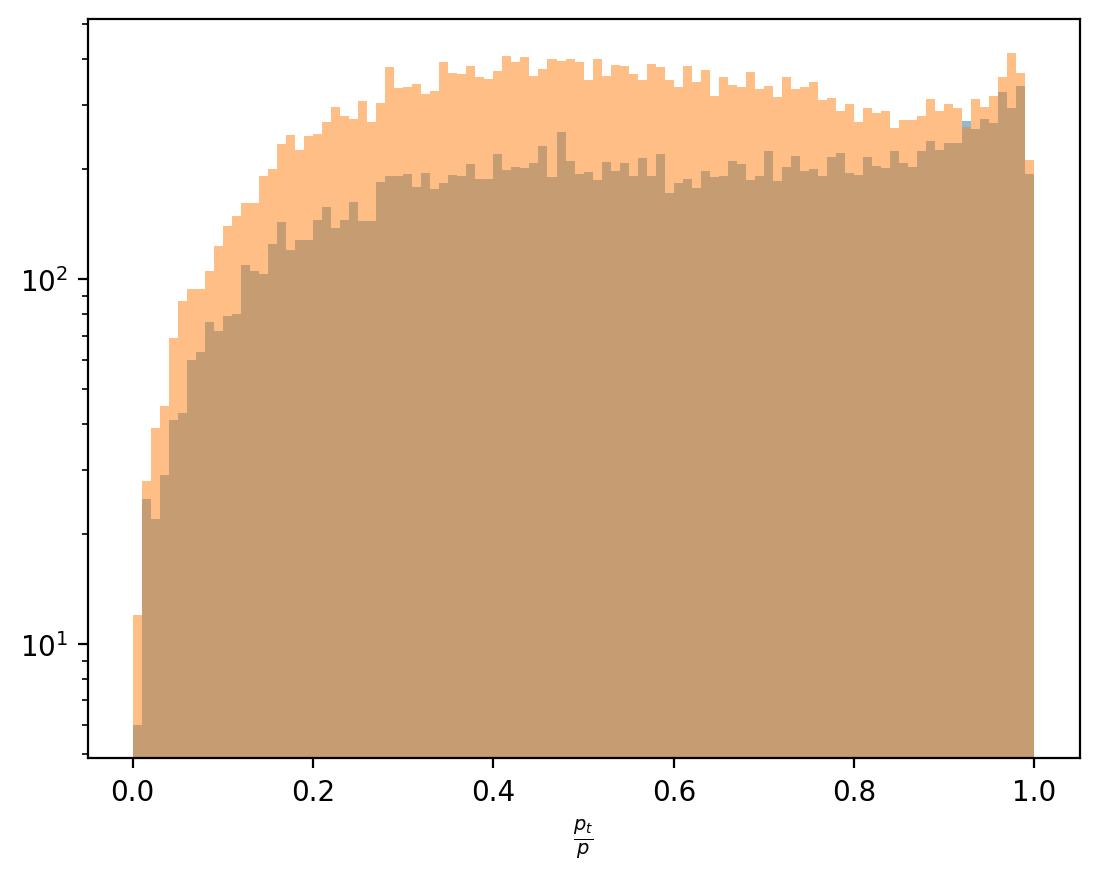

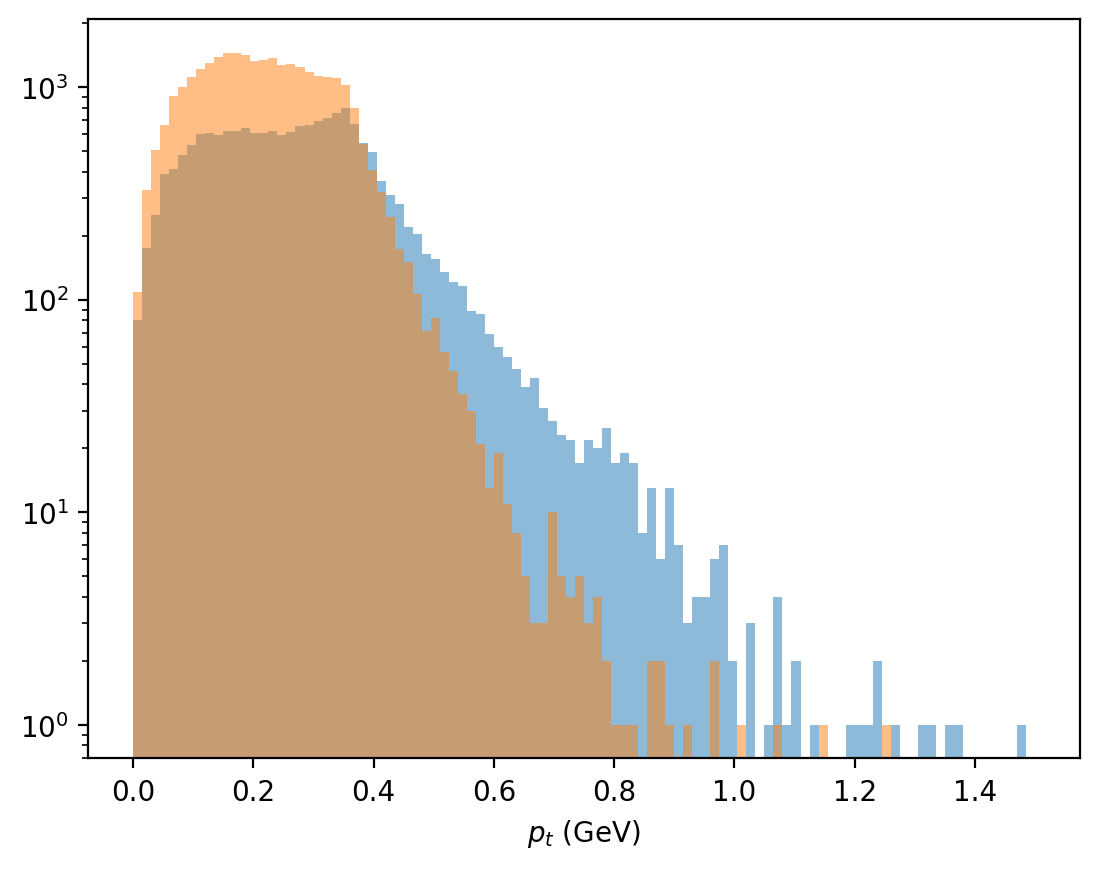

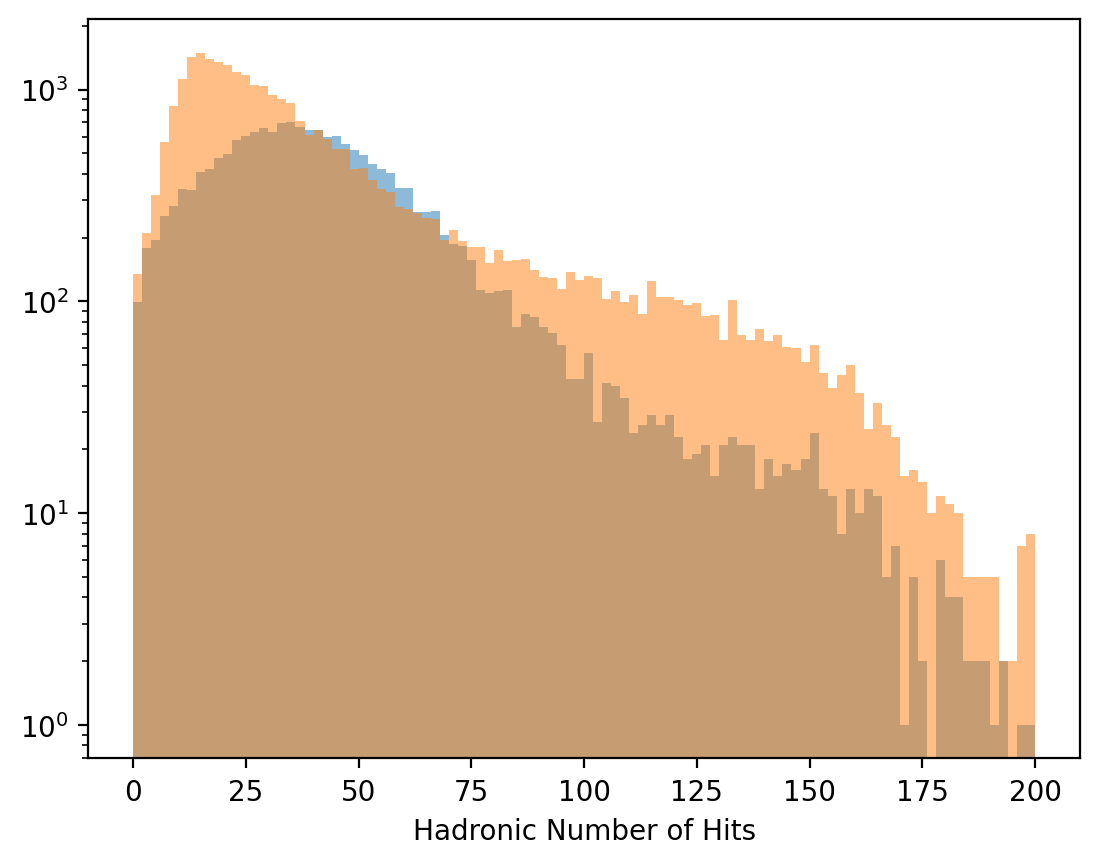

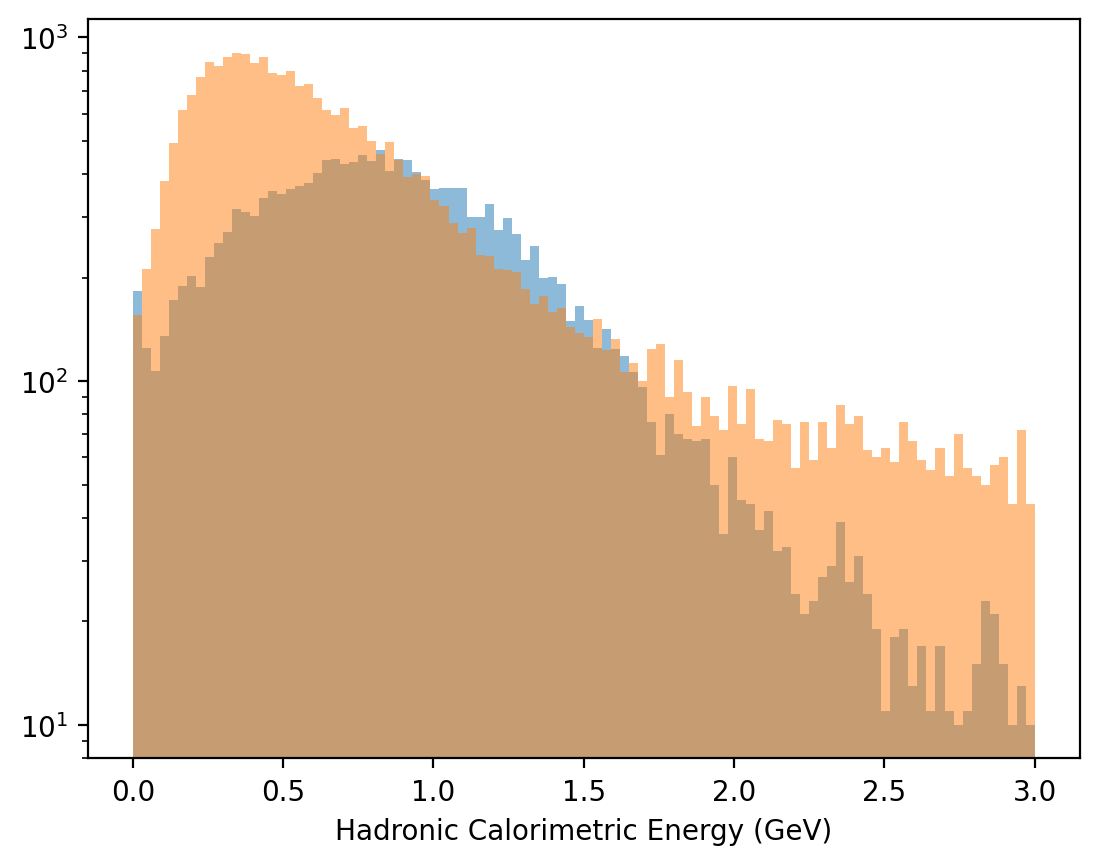

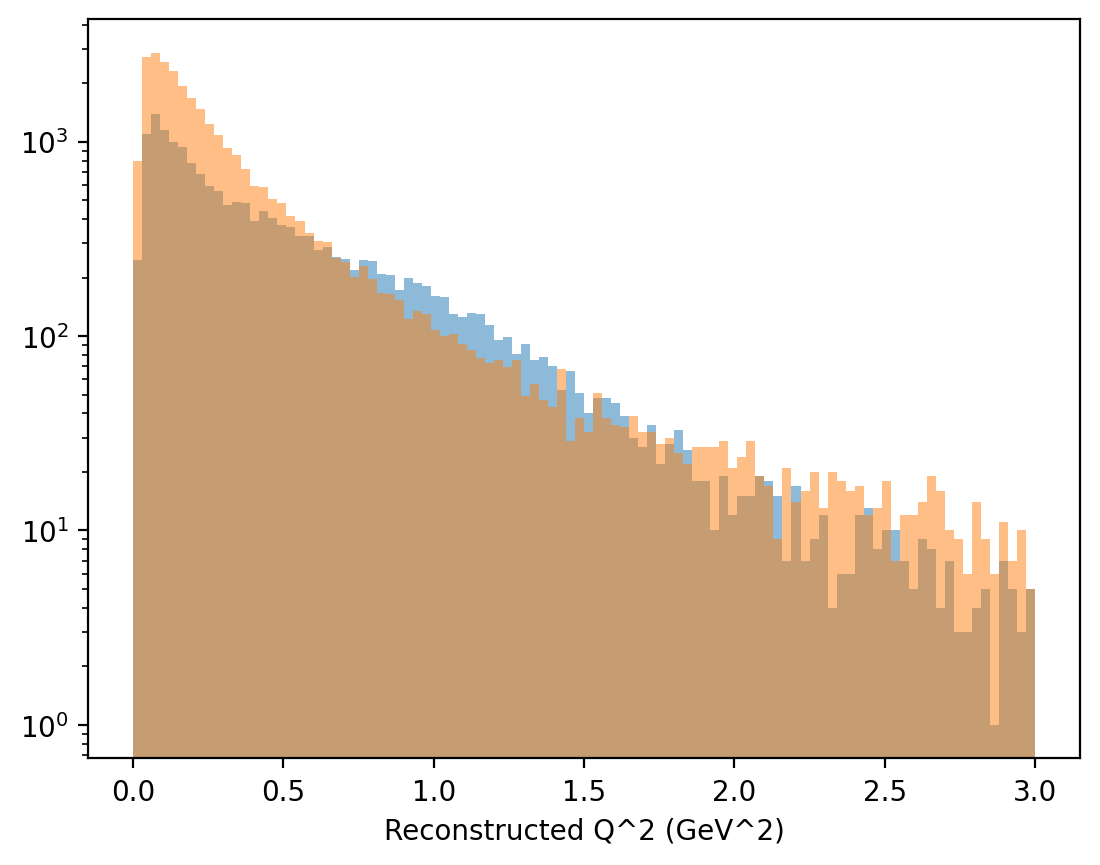

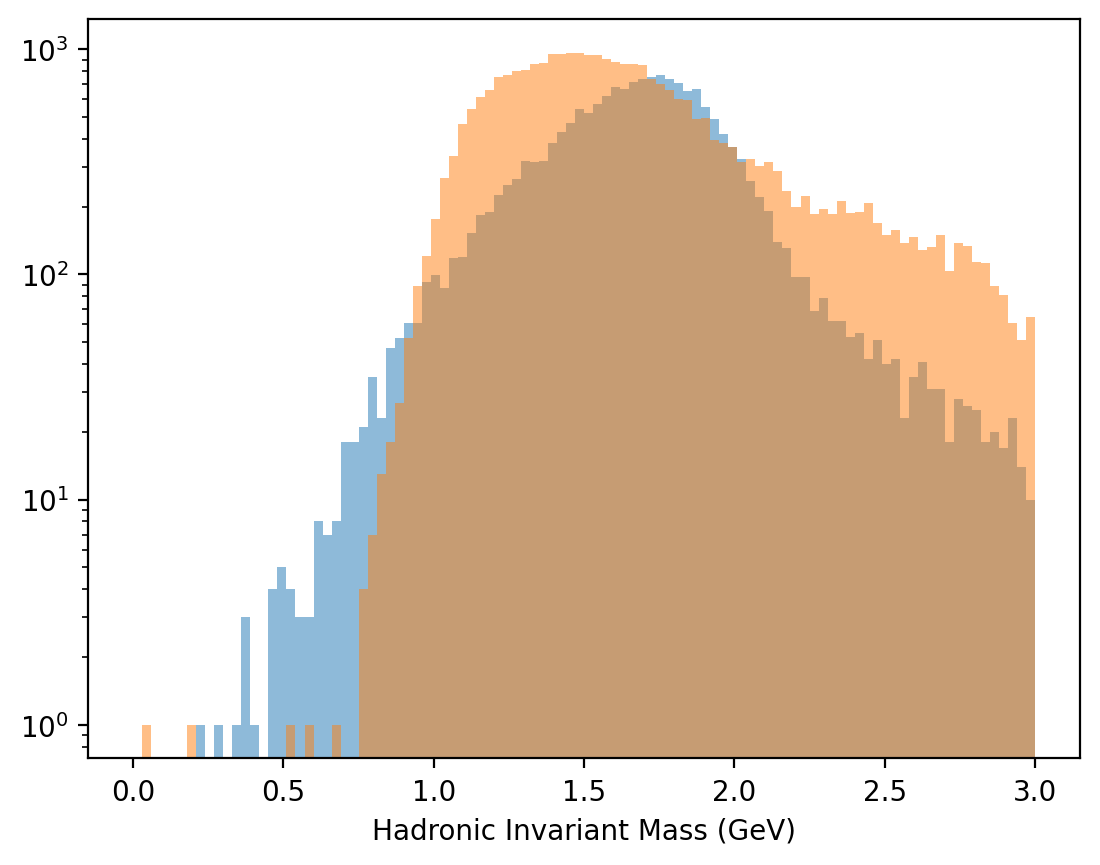

In [6]:


fig, ax = plt.subplots()
ax.hist(td['cosBeamFirst'][td['isNuMuCC']>0],alpha=0.5,bins=np.linspace(0,1,101))
ax.hist(td['cosBeamFirst'][td['isNC']>0],alpha=0.5,bins=np.linspace(0,1,101))
ax.set_xlabel(r"$\cos \theta_{beam}$")
ax.set_yscale('log')


fig, ax = plt.subplots()
ax.hist(td['ptp'][td['isNuMuCC']>0],alpha=0.5,bins=np.linspace(0,1,101))
ax.hist(td['ptp'][td['isNC']>0],alpha=0.5,bins=np.linspace(0,1,101))
ax.set_xlabel(r"$ \frac{p_t}{p}$")
ax.set_yscale('log')


fig, ax = plt.subplots()
ax.hist(td['pt'][td['isNuMuCC']>0],alpha=0.5,bins=np.linspace(0,1.5,101))
ax.hist(td['pt'][td['isNC']>0],alpha=0.5,bins=np.linspace(0,1.5,101))
ax.set_xlabel(r"$ p_t$ (GeV)")
ax.set_yscale('log')


fig, ax = plt.subplots()
ax.hist(td['rec.energy.numu.hadclust.nhit'][td['isNuMuCC']>0],alpha=0.5,bins=np.linspace(0,200,101))
ax.hist(td['rec.energy.numu.hadclust.nhit'][td['isNC']>0],alpha=0.5,bins=np.linspace(0,200,101))
ax.set_xlabel(r"Hadronic Number of Hits")
ax.set_yscale('log')

fig, ax = plt.subplots()
ax.hist(td['rec.energy.numu.hadclust.calE'][td['isNuMuCC']>0],alpha=0.5,bins=np.linspace(0,3,101))
ax.hist(td['rec.energy.numu.hadclust.calE'][td['isNC']>0],alpha=0.5,bins=np.linspace(0,3,101))
ax.set_xlabel(r"Hadronic Calorimetric Energy (GeV)")
ax.set_yscale('log')


fig, ax = plt.subplots()
ax.hist(td['recoq2'][td['isNuMuCC']>0],alpha=0.5,bins=np.linspace(0,3,101))
ax.hist(td['recoq2'][td['isNC']>0],alpha=0.5,bins=np.linspace(0,3,101))
ax.set_xlabel(r"Reconstructed Q^2 (GeV^2)")
ax.set_yscale('log')


fig, ax = plt.subplots()
ax.hist(td['recow'][td['isNuMuCC']>0],alpha=0.5,bins=np.linspace(0,3,101))
ax.hist(td['recow'][td['isNC']>0],alpha=0.5,bins=np.linspace(0,3,101))
ax.set_xlabel(r"Hadronic Invariant Mass (GeV)")
ax.set_yscale('log')




In [7]:
from scipy import stats



varList=['pmu', 
         'pt', 
         'rec.energy.numu.E', 
         'rec.energy.numu.calccE', 
         'rec.energy.numu.hadcalE', 
         'rec.energy.numu.hadclust.calE', 
         'rec.energy.numu.hadclust.nhit',
         'rec.energy.numu.lstmmuon', 
         'rec.energy.numu.lstmnu', 
         'rec.energy.numu.regcvnhadE', 
         'rec.energy.numu.trkccE', 
         'rec.sel.cvnloosepreselptp.ncid', 
         'rec.sel.cvnloosepreselptp.nueid', 
         'rec.sel.cvnloosepreselptp.numuid', 
         'rec.sel.remid.pid', 
         'rec.slc.ncontplanes', 
         'rec.slc.nhit',  
         'rec.trk.kalman.tracks.maxplanecont', 
         'rec.trk.kalman.tracks.nhit', 
         'rec.trk.kalman.tracks.nplane', 
         'recoq2', 
         'recow']


varList=list(td.keys())


for key in ['3flavourveto','isANuECC','isANuMuCC','isNotNu','isNuECC','nonselANueCC','nonselANumuCC','nonselCosmic',
           'nonselNueCC','numu2020pid','numuBasicQuality','numuQuality','numucontain','numucosrej','numufull',
           'numunotpid','rec.mc.nnu','ccAll', 'isCC', 'isNC', 'isNuMuCC', 'nonselNC', 'nonselNumuCC']:
    varList.remove(key)

ksDict={}

for key in varList:
    #fig, ax = plt.subplots()
    #ax.hist(td[key][td['isNuMuCC']>0],alpha=0.5,bins=100,label="NuMu CC")
    #ax.hist(td[key][td['isNC']>0],alpha=0.5,bins=100,label="NC")
    res=stats.ks_2samp(td[key][td['isNuMuCC']>0], td[key][td['isNC']>0])
    #print(key,res.statistic)
    ksDict[key]=res.statistic
    #ax.set_xlabel(key)
    #ax.set_yscale('log')
    #ax.legend()
    
sorted_ksdict = sorted(ksDict.items(), key=lambda x:x[1])
print(sorted_ksdict[-10:])
top_n_vars = dict(sorted_ksdict[-10:])

print(top_n_vars )




[('rec.energy.numu.E', 0.21221553166883417), ('rec.energy.numu.trkccE', 0.21221553166883417), ('rec.sel.remid.pid', 0.21550315801403536), ('rec.energy.numu.calccE', 0.22264422195351496), ('pmu', 0.22380270569834815), ('rec.energy.numu.lstmmuon', 0.22380270569834815), ('rec.slc.nhit', 0.23951236766197764), ('rec.energy.numu.lstmnu', 0.2543820456769762), ('rec.sel.cvnloosepreselptp.ncid', 0.5999227052150269), ('rec.sel.cvnloosepreselptp.numuid', 0.625603432942821)]
{'rec.energy.numu.E': 0.21221553166883417, 'rec.energy.numu.trkccE': 0.21221553166883417, 'rec.sel.remid.pid': 0.21550315801403536, 'rec.energy.numu.calccE': 0.22264422195351496, 'pmu': 0.22380270569834815, 'rec.energy.numu.lstmmuon': 0.22380270569834815, 'rec.slc.nhit': 0.23951236766197764, 'rec.energy.numu.lstmnu': 0.2543820456769762, 'rec.sel.cvnloosepreselptp.ncid': 0.5999227052150269, 'rec.sel.cvnloosepreselptp.numuid': 0.625603432942821}


Number of not selected events 49952
Number of not selected NuMu CC 17969
Number of not selected ANuMu CC 311
Number of not selected Nue CC 1516
Number of not selected ANue CC 95
Number of not selected NC 29486
Number of not selected Cosmic 575
Number of these selected 49952


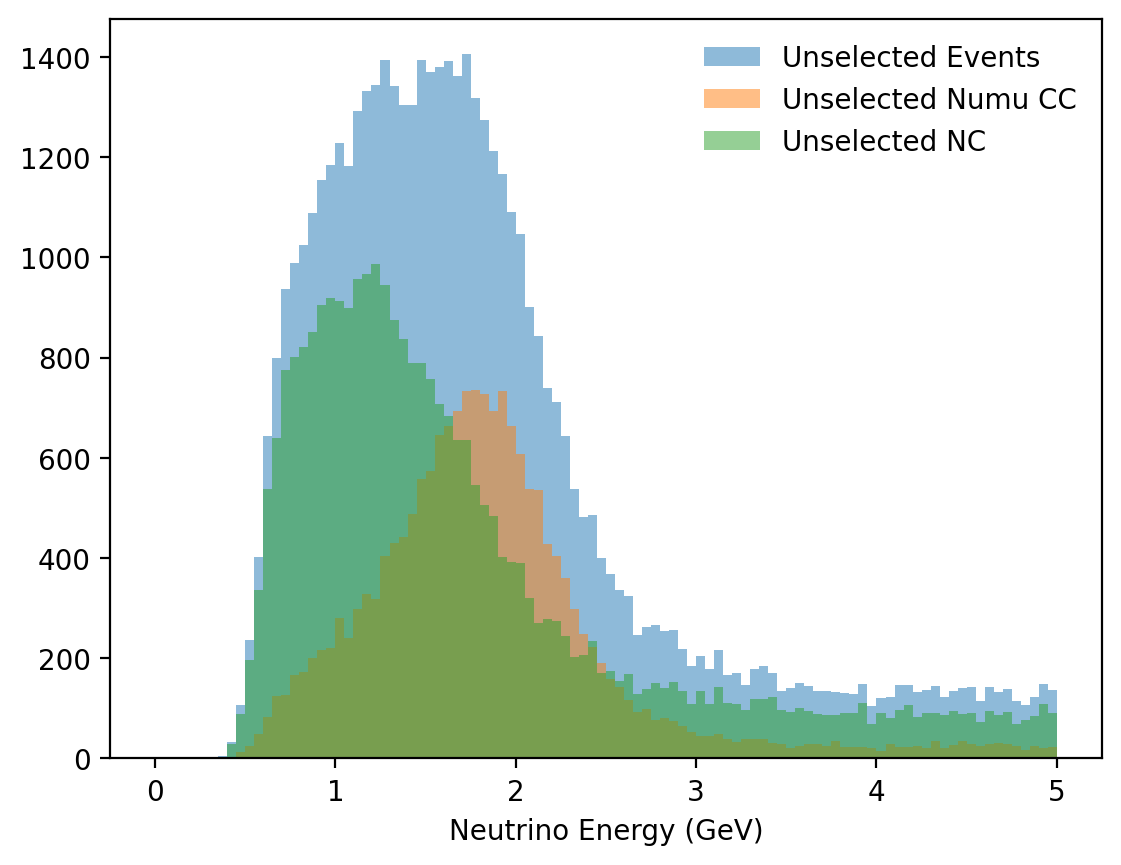

In [8]:
numNonSelNumuCC=np.sum(td['nonselNumuCC'])
numNonSelANumuCC=np.sum(td['nonselANumuCC'])
numNonSelNueCC=np.sum(td['nonselNueCC'])
numNonSelANueCC=np.sum(td['nonselANueCC'])
numNonSelNC=np.sum(td['nonselNC'])
numNonSelCosmic=np.sum(td['nonselCosmic'])

print("Number of not selected events",np.sum(td['numunotpid']))
print("Number of not selected NuMu CC",numNonSelNumuCC)
print("Number of not selected ANuMu CC",numNonSelANumuCC)
print("Number of not selected Nue CC",numNonSelNueCC)
print("Number of not selected ANue CC",numNonSelANueCC)
print("Number of not selected NC",numNonSelNC)
print("Number of not selected Cosmic",numNonSelCosmic)
print("Number of these selected",numNonSelNumuCC+numNonSelANumuCC+numNonSelNC+numNonSelCosmic+numNonSelNueCC+numNonSelANueCC)

fig, ax = plt.subplots()
ax.hist(td['rec.energy.numu.lstmnu'][td['numunotpid']>0],alpha=0.5,label="Unselected Events",bins=np.linspace(0,5,101))
ax.hist(td['rec.energy.numu.lstmnu'][td['nonselNumuCC']>0],alpha=0.5,label="Unselected Numu CC",bins=np.linspace(0,5,101))
ax.hist(td['rec.energy.numu.lstmnu'][td['nonselNC']>0],alpha=0.5,label="Unselected NC",bins=np.linspace(0,5,101))
ax.set_xlabel("Neutrino Energy (GeV)")
ax.legend()

In [9]:

varList=top_n_vars 

print(len(varList))

listOfArrays=[]
for key in varList:
    listOfArrays.append(td[key])

numVars=len(varList)    
    
#data=np.vstack((td[varList[0]],td[varList[1]],td[varList[2]],td[varList[3]],td[varList[4]],td[varList[5]],td[varList[6]],td[varList[7]],td[varList[8]])).T
data=np.vstack(listOfArrays).T
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#data = scaler.transform(data)
#test_features = scaler.transform(test_features)
print(np.shape(data))
label=td['isNuMuCC'].reshape(np.shape(data)[0],1)


def getUndersamplingArray(label):
    opLabel=1-label
    numTot=np.shape(label)[0]
    numPos=np.sum(label)
    numNeg=numTot-numPos
    print(numTot,numPos,numNeg)
    negCumSum=np.cumsum(opLabel)*np.reshape(opLabel,np.shape(label)[0])
    print(negCumSum[-10:])
    remNeg=np.zeros(negCumSum.shape,dtype=int)
    remNeg[negCumSum>numPos]=int(1)
    print(np.sum(remNeg))
    print(remNeg[-10:])
    return remNeg

#remNeg=getUndersamplingArray(label)
#label=label[remNeg<1]
#data=data[remNeg<1]

from sklearn.utils import shuffle
data,label = shuffle(data,label, random_state=0)
    
label=np.reshape(label,np.shape(label)[0])
print(np.shape(label)) 
print(np.shape(data))


X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.4)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

numPos=np.sum(y_train)
numNeg=len(y_train)-numPos
class_weight = {0: 0.5*float(len(y_train))/numNeg, 1: 0.5*float(len(y_train))/numPos}

print(class_weight)

print(np.sum(y_train),len(y_train))

10
(49952, 10)
(49952,)
(49952, 10)
{0: 0.780616763035891, 1: 1.3908947466122146}
10774 29971


In [10]:
model = keras.Sequential([
    keras.layers.Dense(
          16, activation='relu',
          input_shape=(X_train.shape[-1],)),
    keras.layers.Dropout(0.5),
    #keras.layers.Dense(16,activation='relu'),
    #keras.layers.Dropout(0.2),
    #keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
    
metrics = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=15,
    mode='max',
    restore_best_weights=True)

model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=metrics)

Metal device set to: Apple M1 Max


2023-06-30 10:15:36.999859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-30 10:15:37.000002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
history=model.fit(X_train,y_train, epochs=100, batch_size=256,validation_data=(X_test, y_test),
    callbacks=[early_stopping])#,class_weight=class_weight)plot_metrics

Epoch 1/100


2023-06-30 10:15:37.154181: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-30 10:15:37.498905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - ETA: 0s - loss: 0.5964 - tp: 4983.0000 - fp: 3327.0000 - tn: 15870.0000 - fn: 5791.0000 - accuracy: 0.6958 - precision: 0.5996 - recall: 0.4625 - auc: 0.7278 - prc: 0.5839

2023-06-30 10:15:39.968965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 4s 28ms/step - loss: 0.5964 - tp: 4983.0000 - fp: 3327.0000 - tn: 15870.0000 - fn: 5791.0000 - accuracy: 0.6958 - precision: 0.5996 - recall: 0.4625 - auc: 0.7278 - prc: 0.5839 - val_loss: 0.4215 - val_tp: 4483.0000 - val_fp: 791.0000 - val_tn: 11995.0000 - val_fn: 2712.0000 - val_accuracy: 0.8247 - val_precision: 0.8500 - val_recall: 0.6231 - val_auc: 0.8807 - val_prc: 0.8332
Epoch 2/100
118/118 [==============================] - 3s 23ms/step - loss: 0.4701 - tp: 6543.0000 - fp: 1830.0000 - tn: 17367.0000 - fn: 4231.0000 - accuracy: 0.7978 - precision: 0.7814 - recall: 0.6073 - auc: 0.8407 - prc: 0.7688 - val_loss: 0.4006 - val_tp: 4732.0000 - val_fp: 911.0000 - val_tn: 11875.0000 - val_fn: 2463.0000 - val_accuracy: 0.8311 - val_precision: 0.8386 - val_recall: 0.6577 - val_auc: 0.8892 - val_prc: 0.8407
Epoch 3/100
118/118 [==============================] - 3s 25ms/step - loss: 0.4454 - tp: 6813.0000 - fp: 1712.0000 - tn: 17485.0000 - fn: 3961

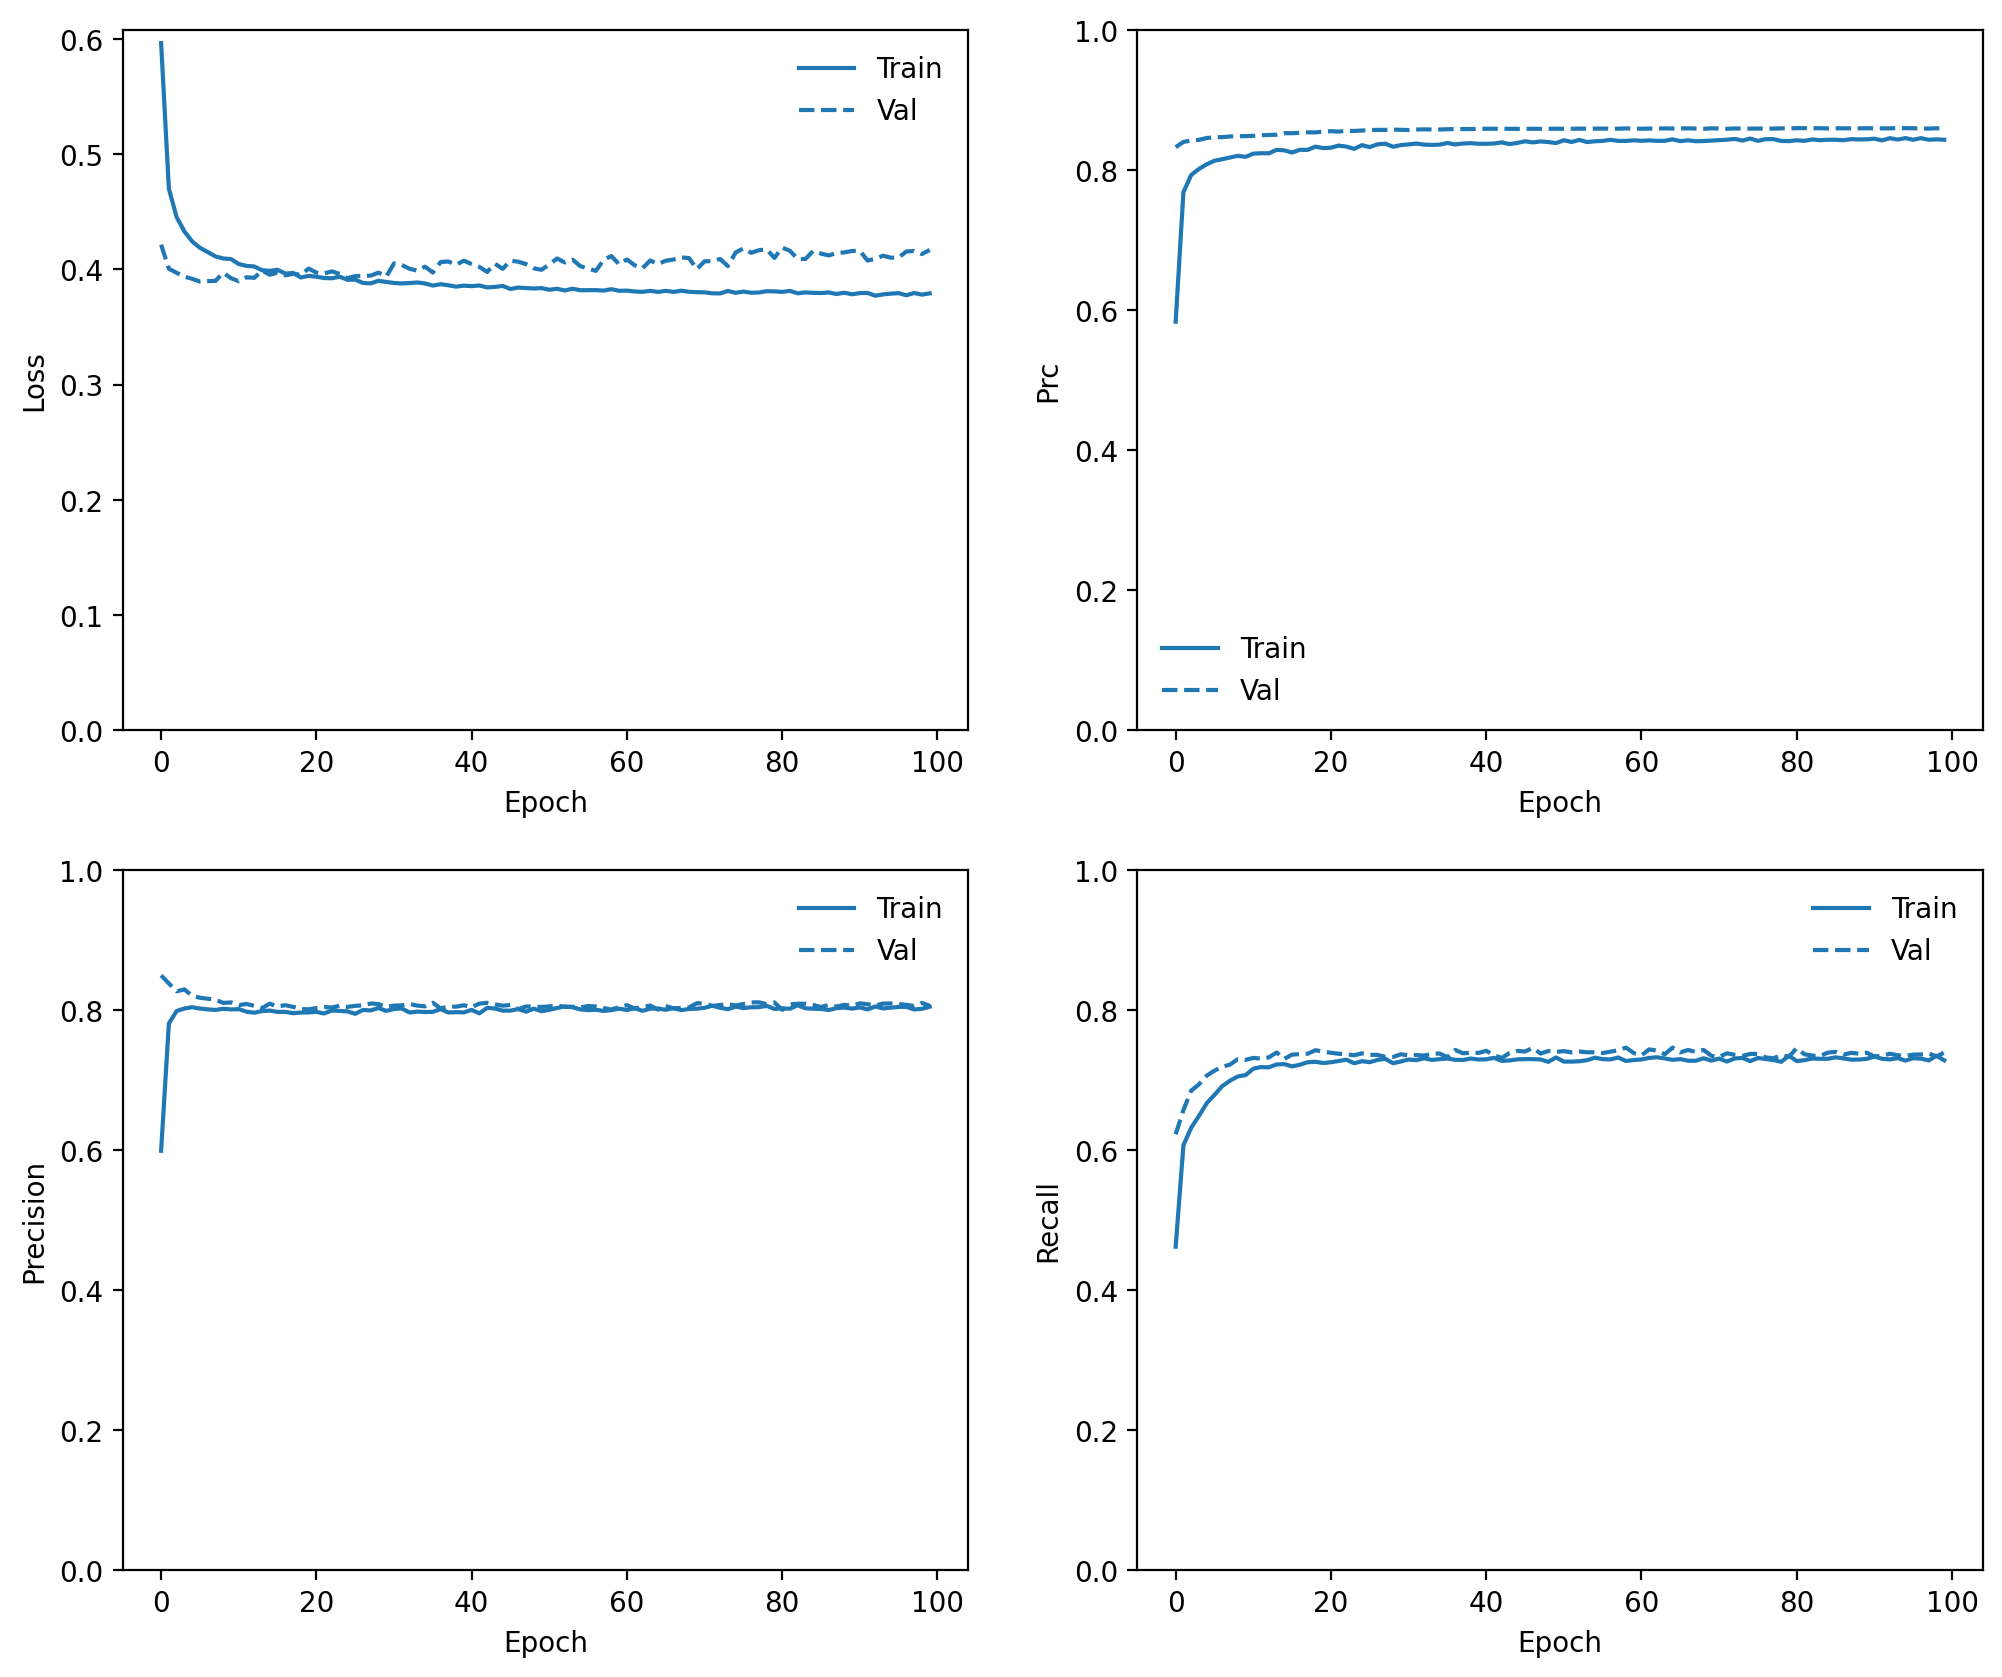

In [12]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()
    
plot_metrics(history)